In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from adjustText import adjust_text

In [2]:
plt.style.use('fivethirtyeight')

In [3]:
from nba_api.stats.endpoints.leaguedashplayerstats import LeagueDashPlayerStats

In [4]:
traditional_stats = LeagueDashPlayerStats()

In [5]:
traditional_df = traditional_stats.get_data_frames()[0]

In [6]:
advanced_stats = LeagueDashPlayerStats(measure_type_detailed_defense='Advanced')

In [7]:
advanced_df = advanced_stats.get_data_frames()[0]

In [8]:
merged_df = pd.merge(left=traditional_df, right=advanced_df, on='PLAYER_ID')

In [9]:
list(merged_df.columns)

['PLAYER_ID',
 'PLAYER_NAME_x',
 'TEAM_ID_x',
 'TEAM_ABBREVIATION_x',
 'AGE_x',
 'GP_x',
 'W_x',
 'L_x',
 'W_PCT_x',
 'MIN_x',
 'FGM_x',
 'FGA_x',
 'FG_PCT_x',
 'FG3M',
 'FG3A',
 'FG3_PCT',
 'FTM',
 'FTA',
 'FT_PCT',
 'OREB',
 'DREB',
 'REB',
 'AST',
 'TOV',
 'STL',
 'BLK',
 'BLKA',
 'PF',
 'PFD',
 'PTS',
 'PLUS_MINUS',
 'NBA_FANTASY_PTS',
 'DD2',
 'TD3',
 'GP_RANK_x',
 'W_RANK_x',
 'L_RANK_x',
 'W_PCT_RANK_x',
 'MIN_RANK_x',
 'FGM_RANK_x',
 'FGA_RANK_x',
 'FG_PCT_RANK_x',
 'FG3M_RANK',
 'FG3A_RANK',
 'FG3_PCT_RANK',
 'FTM_RANK',
 'FTA_RANK',
 'FT_PCT_RANK',
 'OREB_RANK',
 'DREB_RANK',
 'REB_RANK',
 'AST_RANK',
 'TOV_RANK',
 'STL_RANK',
 'BLK_RANK',
 'BLKA_RANK',
 'PF_RANK',
 'PFD_RANK',
 'PTS_RANK',
 'PLUS_MINUS_RANK',
 'NBA_FANTASY_PTS_RANK',
 'DD2_RANK',
 'TD3_RANK',
 'CFID_x',
 'CFPARAMS_x',
 'PLAYER_NAME_y',
 'TEAM_ID_y',
 'TEAM_ABBREVIATION_y',
 'AGE_y',
 'GP_y',
 'W_y',
 'L_y',
 'W_PCT_y',
 'MIN_y',
 'E_OFF_RATING',
 'OFF_RATING',
 'sp_work_OFF_RATING',
 'E_DEF_RATING',
 'DEF_RA

In [10]:
filtered_df = merged_df.loc[(merged_df.MIN_x > 15) & (merged_df.GP_x > 8)]

In [11]:
sorted_df = filtered_df.sort_values(by='FG3M', ascending=False).iloc[:50]

6

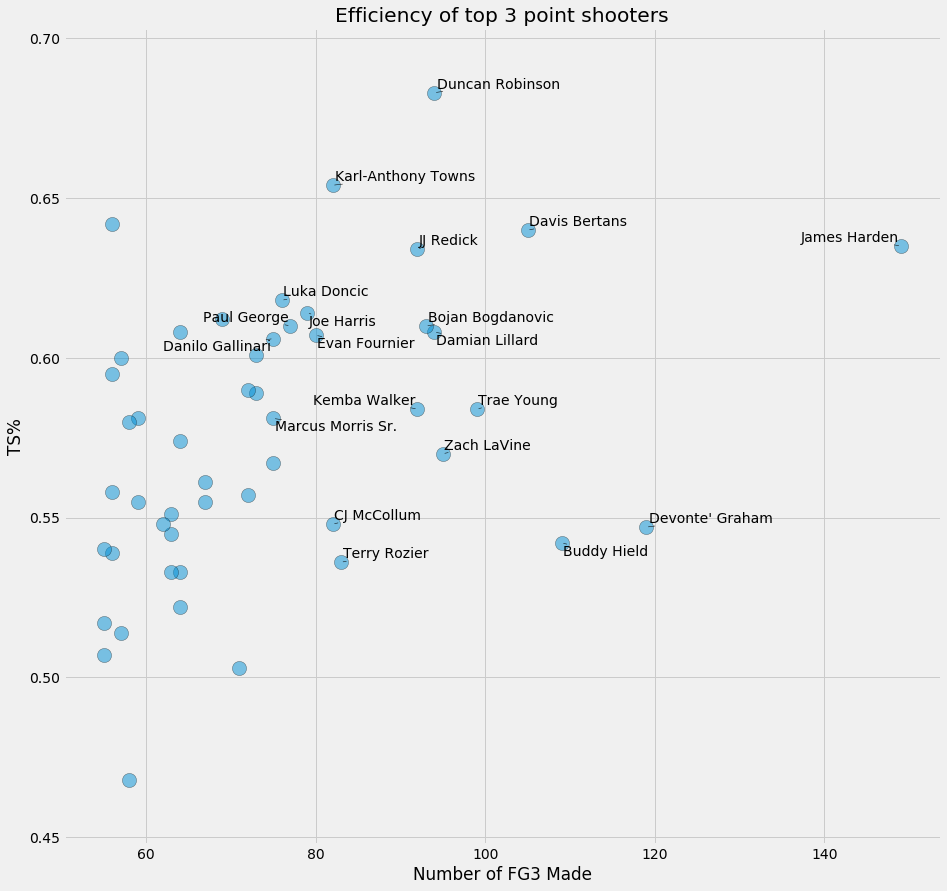

In [12]:
fig, ax = plt.subplots(figsize=(14, 14))

#ax.scatter(x=filtered_df.FG3M, y=filtered_df.FG3A)
ax.scatter(x=sorted_df.FG3M, y=sorted_df.TS_PCT, s=200, alpha=0.5, edgecolors='black')

texts = []

for index in range(len(sorted_df))[:20]:
    item = sorted_df.iloc[index]
    texts.append(ax.text(x=item.FG3M, y=item.TS_PCT, s=item.PLAYER_NAME_x))

ax.set_xlabel('Number of FG3 Made')
ax.set_ylabel('TS%')
ax.set_title('Efficiency of top 3 point shooters')
adjust_text(texts, arrowprops=dict(arrowstyle="-", color='k'))

6

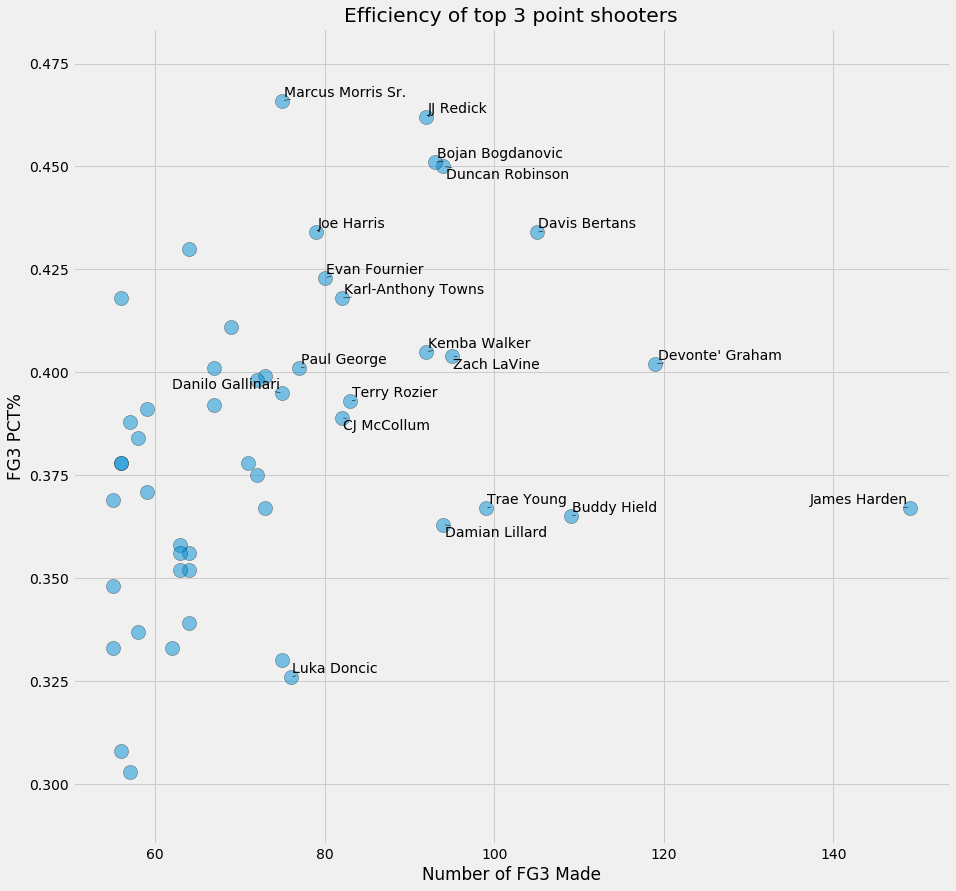

In [13]:
fig, ax = plt.subplots(figsize=(14, 14))

#ax.scatter(x=filtered_df.FG3M, y=filtered_df.FG3A)
ax.scatter(x=sorted_df.FG3M, y=sorted_df.FG3_PCT, s=200, alpha=0.5, edgecolors='black')

texts = []

for index in range(len(sorted_df))[:20]:
    item = sorted_df.iloc[index]
    texts.append(ax.text(x=item.FG3M, y=item.FG3_PCT, s=item.PLAYER_NAME_x))

ax.set_xlabel('Number of FG3 Made')
ax.set_ylabel('FG3 PCT%')
ax.set_title('Efficiency of top 3 point shooters')
adjust_text(texts, arrowprops=dict(arrowstyle="-", color='k'))

## TO DO 

* Dodaj omjer trojki i običnih šuteva

* Tko šutira nakon driblanja, tko je spot up šuter

* Ovo gore, ovisnost o TS_PCT, možda bolje ovdje ovisnost o F3_PCT ili F3A


In [14]:
reduced_df = sorted_df[:35].sort_values(by='FG3M')

Text(0.5, 1.0, 'Top three point shooters and ratio of three pointers and total field goals made')

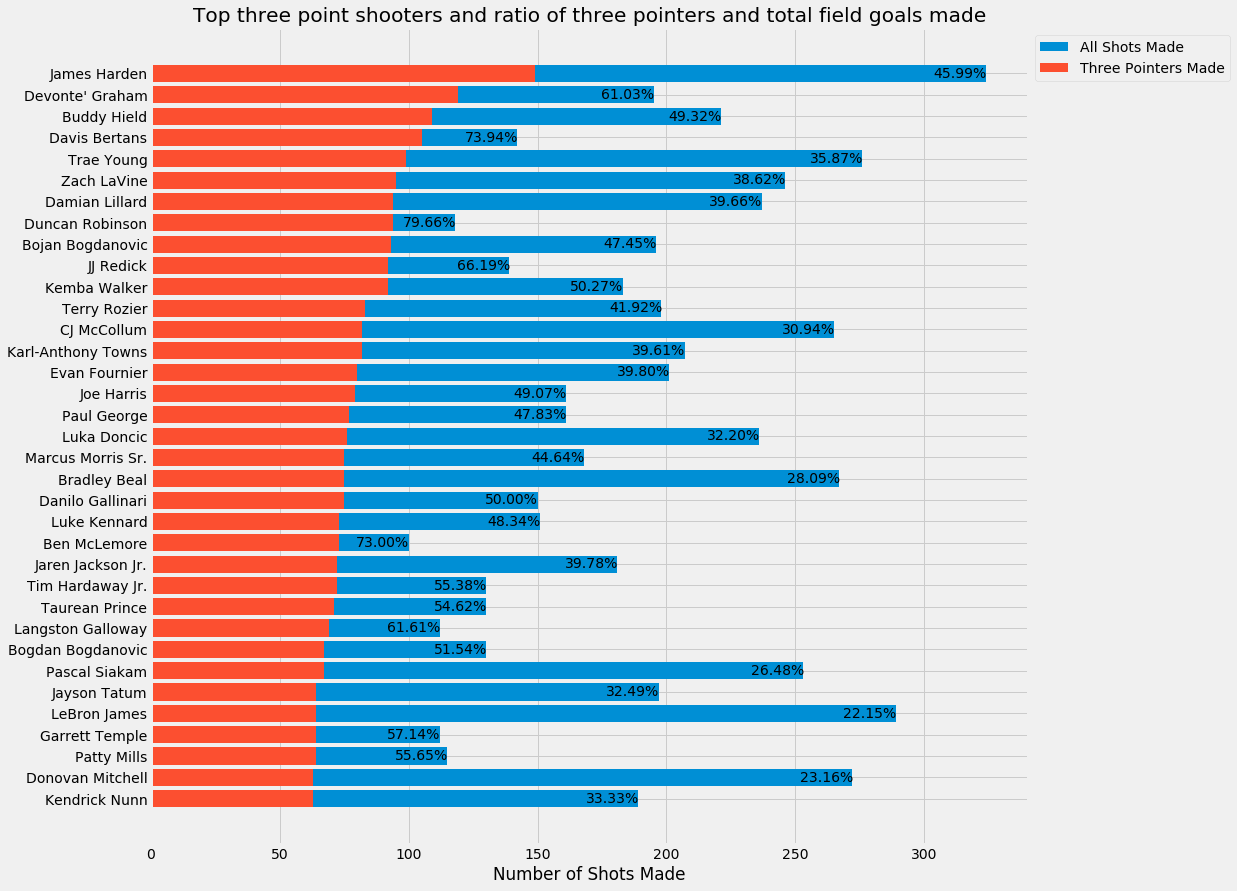

In [15]:
fig, ax = plt.subplots(figsize=(14, 14))

#ax.scatter(x=filtered_df.FG3M, y=filtered_df.FG3A)

three_pt_ratio = reduced_df.FG3M / (reduced_df.FGM_x)

plt.barh(y=reduced_df.PLAYER_NAME_x, width=reduced_df.FGM_x, label='All Shots Made')
plt.barh(y=reduced_df.PLAYER_NAME_x, width=reduced_df.FG3M, label='Three Pointers Made')
for index in range(len(reduced_df)):
    item = reduced_df.iloc[index]
    plt.text(
        x=item.FGM_x - 10,
        y=item.PLAYER_NAME_x,
        va='center',
        ha='center',
        s=f"{float(three_pt_ratio.iloc[index])*100:.2f}%"
    )
_ = plt.yticks(reduced_df.PLAYER_NAME_x)
plt.xlabel('Number of Shots Made')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.title('Top three point shooters and ratio of three pointers and total field goals made')

Text(0.5, 1.0, 'Omjer zabijenih trica i svih šuteva najboljih tricaša ove godine')

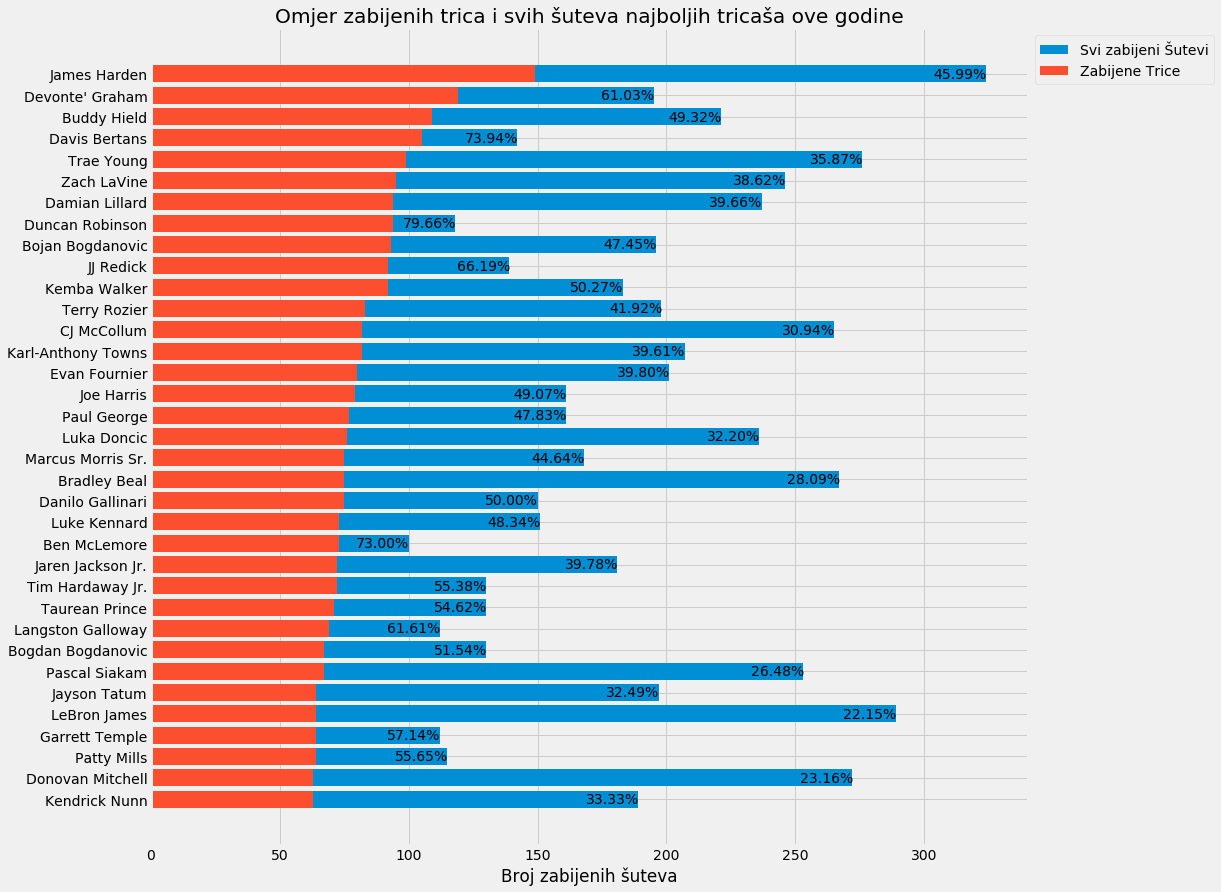

In [16]:
fig, ax = plt.subplots(figsize=(14, 14))

#ax.scatter(x=filtered_df.FG3M, y=filtered_df.FG3A)

three_pt_ratio = reduced_df.FG3M / (reduced_df.FGM_x)

plt.barh(y=reduced_df.PLAYER_NAME_x, width=reduced_df.FGM_x, label='Svi zabijeni Šutevi')
plt.barh(y=reduced_df.PLAYER_NAME_x, width=reduced_df.FG3M, label='Zabijene Trice')
for index in range(len(reduced_df)):
    item = reduced_df.iloc[index]
    plt.text(
        x=item.FGM_x - 10,
        y=item.PLAYER_NAME_x,
        va='center',
        ha='center',
        s=f"{float(three_pt_ratio.iloc[index])*100:.2f}%"
    )
_ = plt.yticks(reduced_df.PLAYER_NAME_x)
plt.xlabel('Broj zabijenih šuteva')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.title('Omjer zabijenih trica i svih šuteva najboljih tricaša ove godine')

## Touch time

In [17]:
from nba_api.stats.endpoints.leaguedashplayerptshot import LeagueDashPlayerPtShot

In [18]:
touch_times = {
    'SHORT': 'Touch < 2 Seconds',
    'MEDIUM': 'Touch 2-6 Seconds',
    'LONG': 'Touch 6+ Seconds'
}

In [19]:
short_shots = LeagueDashPlayerPtShot(touch_time_range_nullable=touch_times['SHORT']).get_data_frames()[0]

In [20]:
medium_shots = LeagueDashPlayerPtShot(touch_time_range_nullable=touch_times['MEDIUM']).get_data_frames()[0]
long_shots = LeagueDashPlayerPtShot(touch_time_range_nullable=touch_times['LONG']).get_data_frames()[0]

In [21]:
short_medium = pd.merge(short_shots, medium_shots, on='PLAYER_ID', suffixes=('_SHORT', '_MEDIUM'), how='outer')

In [22]:
all_shots = pd.merge(short_medium, long_shots, on='PLAYER_ID', how='outer')

In [23]:
all_shots = all_shots.fillna(value=0)

In [24]:
all_shots.loc[:, 'FG3M_SUM'] = all_shots.FG3M_SHORT + all_shots.FG3M_MEDIUM + all_shots.FG3M 

In [25]:
all_shots = all_shots.sort_values(by='FG3M_SUM', ascending=False)

In [26]:
filtered = all_shots.iloc[:30].sort_values(by='FG3M_SUM', ascending=True)

Text(0.5, 0, 'Three Pointers Made')

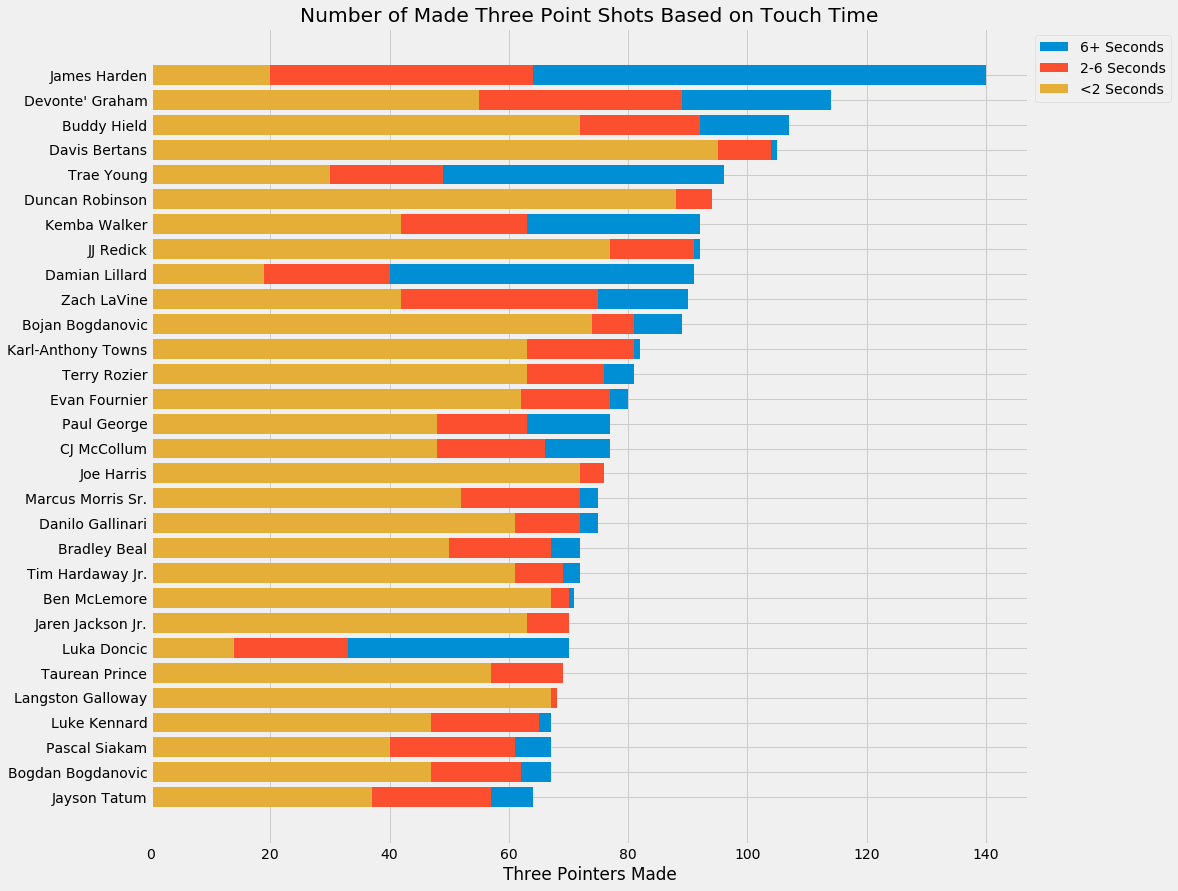

In [27]:
plt.figure(figsize=(14, 14))

plt.barh(y=filtered.PLAYER_NAME_SHORT, width=filtered.FG3M_SHORT + filtered.FG3M_MEDIUM + filtered.FG3M, label='6+ Seconds')
plt.barh(y=filtered.PLAYER_NAME_SHORT, width=filtered.FG3M_SHORT + filtered.FG3M_MEDIUM, label='2-6 Seconds')
plt.barh(y=filtered.PLAYER_NAME_SHORT, width=filtered.FG3M_SHORT, label='<2 Seconds')

plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.title('Number of Made Three Point Shots Based on Touch Time')
plt.xlabel('Three Pointers Made')

Text(0.5, 0, 'Broj zabijenih trica')

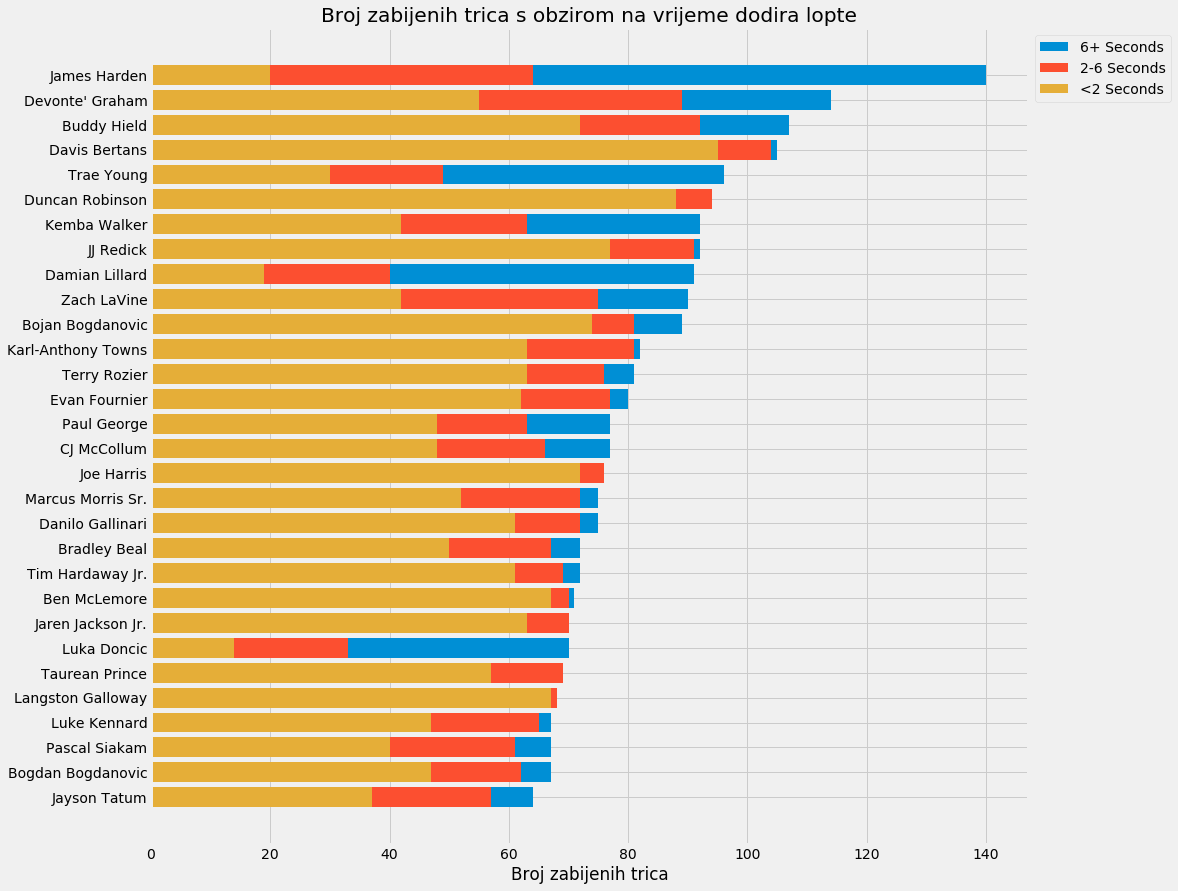

In [28]:
plt.figure(figsize=(14, 14))

plt.barh(y=filtered.PLAYER_NAME_SHORT, width=filtered.FG3M_SHORT + filtered.FG3M_MEDIUM + filtered.FG3M, label='6+ Seconds')
plt.barh(y=filtered.PLAYER_NAME_SHORT, width=filtered.FG3M_SHORT + filtered.FG3M_MEDIUM, label='2-6 Seconds')
plt.barh(y=filtered.PLAYER_NAME_SHORT, width=filtered.FG3M_SHORT, label='<2 Seconds')

plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.title('Broj zabijenih trica s obzirom na vrijeme dodira lopte')
plt.xlabel('Broj zabijenih trica')

## Real Catch and Shoot vs Pull Up Shots

In [29]:
from nba_api.stats.endpoints.leaguedashptstats import LeagueDashPtStats

In [30]:
catch_and_shoot = LeagueDashPtStats(pt_measure_type='CatchShoot', player_or_team='Player')

In [31]:
catch_and_shoot = catch_and_shoot.get_data_frames()[0]

In [32]:
pull_up = LeagueDashPtStats(pt_measure_type='PullUpShot', player_or_team='Player').get_data_frames()[0]

In [33]:
merged = pd.merge(left=catch_and_shoot, right=pull_up, on='PLAYER_ID', suffixes=('_CATCH_SHOOT', '_PULL_UP'))

In [34]:
merged.loc[:, 'TOTAL_FG3M'] = merged.CATCH_SHOOT_FG3M + merged.PULL_UP_FG3M

In [35]:
merged.loc[:, 'TOTAL_FG3A'] = merged.CATCH_SHOOT_FG3A + merged.PULL_UP_FG3A

In [36]:
sorted_df = merged.sort_values(by='TOTAL_FG3M', ascending=False)

In [37]:
sorted_df = sorted_df.iloc[:30]

In [38]:
sorted_df = sorted_df.sort_values(by='TOTAL_FG3M')

Text(0.5, 1.0, 'Ratio of Pull Ups and Catch And Shoot Shots')

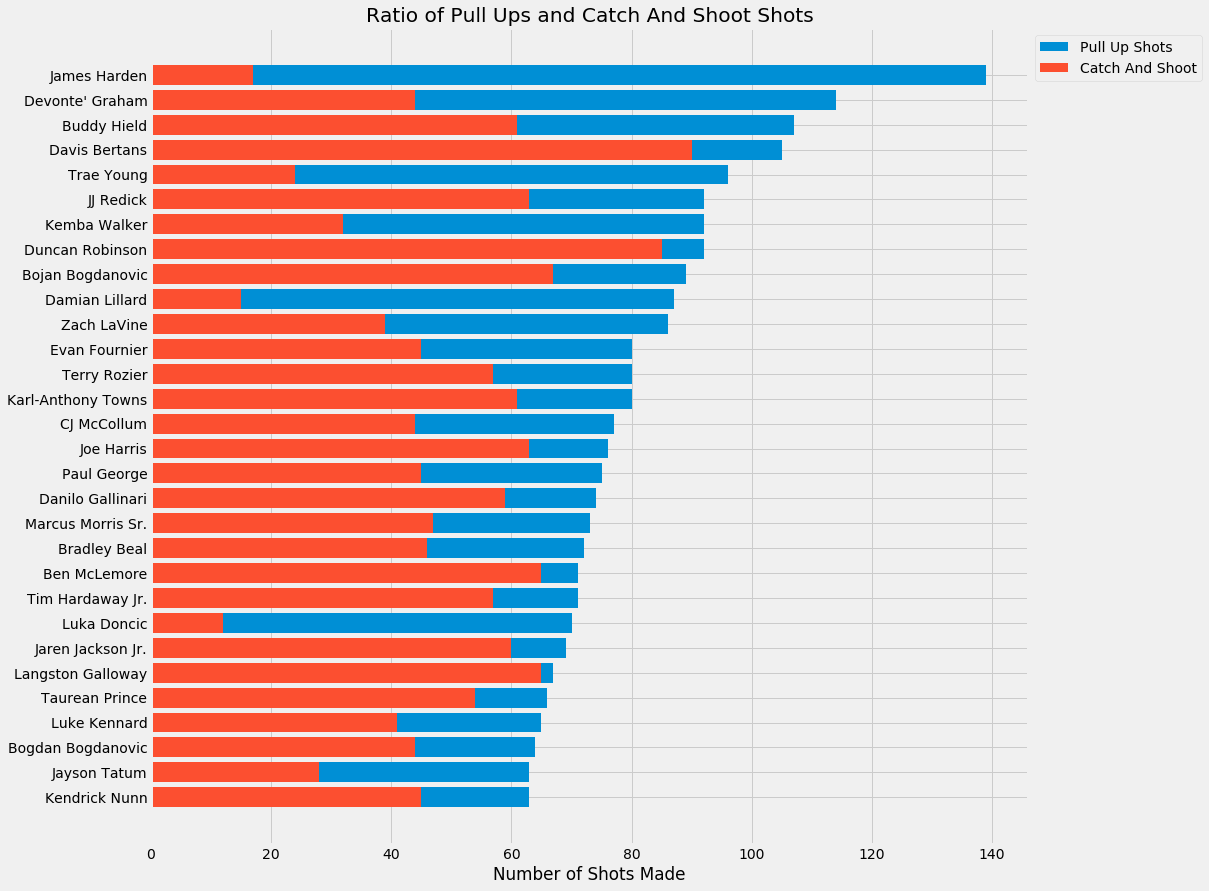

In [39]:
fig, ax = plt.subplots(figsize=(14, 14))

#ax.scatter(x=filtered_df.FG3M, y=filtered_df.FG3A)

# three_pt_ratio = reduced_df.FG3M / (reduced_df.FGM_x)

plt.barh(y=sorted_df.PLAYER_NAME_CATCH_SHOOT, width=sorted_df.TOTAL_FG3M, label='Pull Up Shots')
plt.barh(y=sorted_df.PLAYER_NAME_CATCH_SHOOT, width=sorted_df.CATCH_SHOOT_FG3M, label='Catch And Shoot')

plt.xlabel('Number of Shots Made')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.title('Ratio of Pull Ups and Catch And Shoot Shots')